# Fit

In [137]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline


In [138]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [139]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [140]:
df.duplicated().sum()

np.int64(0)

In [141]:
X = df.drop(columns='Workout_Type')
y = df['Workout_Type']

In [142]:
print(df['Workout_Type'].value_counts())
print(df['Workout_Type'].nunique())


Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64
4


<Axes: xlabel='Workout_Type', ylabel='count'>

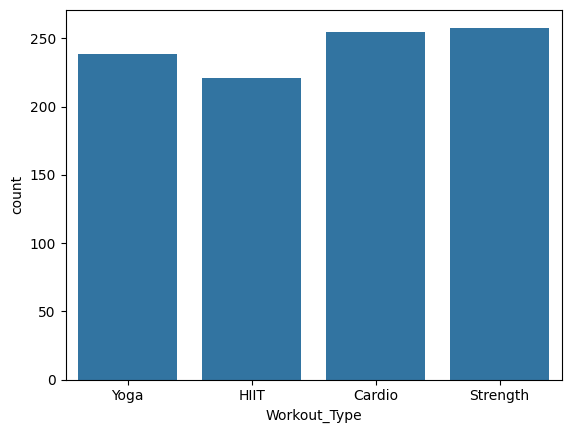

In [143]:

sns.countplot(x='Workout_Type', data=df)


In [144]:
label_encod = LabelEncoder()

y = label_encod.fit_transform(y)
print(label_encod.classes_)
joblib.dump(label_encod, 'LabelEncooder.joblib')

['Cardio' 'HIIT' 'Strength' 'Yoga']


['LabelEncooder.joblib']

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Fat_Percentage                 973 non-null    float64
 10  Water_Intake (liters)          973 non-null    float64
 11  Workout_Frequency (days/week)  973 non-null    int64  
 12  Experience_Level               973 non-null    int

In [146]:
num_column = X.select_dtypes(include='number').columns.to_list()
cat_column = X.select_dtypes(exclude='number').columns.to_list()

In [147]:
cat_column

['Gender']

In [148]:
encoded_X = pd.get_dummies(df[cat_column], drop_first=False)
X = X.drop(columns=cat_column)
encoded_X = encoded_X.astype(int)
X = pd.concat([X, encoded_X], axis=1)


In [149]:
X

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,1
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,0,1
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,0,1
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,1,0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,0,1


In [150]:
scale = StandardScaler()

X = scale.fit_transform(X)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
X_train.shape

(778, 15)

In [153]:
logis = LogisticRegression(max_iter=1000)
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  4 14 14]
 [16  6 10 12]
 [17 11 15  9]
 [16  6 12 14]]
              precision    recall  f1-score   support

           0       0.28      0.37      0.32        51
           1       0.22      0.14      0.17        44
           2       0.29      0.29      0.29        52
           3       0.29      0.29      0.29        48

    accuracy                           0.28       195
   macro avg       0.27      0.27      0.27       195
weighted avg       0.27      0.28      0.27       195



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)



[[12 11 16 12]
 [15  5 15  9]
 [15  8 12 17]
 [17  9 13  9]]
              precision    recall  f1-score   support

           0       0.20      0.24      0.22        51
           1       0.15      0.11      0.13        44
           2       0.21      0.23      0.22        52
           3       0.19      0.19      0.19        48

    accuracy                           0.19       195
   macro avg       0.19      0.19      0.19       195
weighted avg       0.19      0.19      0.19       195



In [155]:
random = RandomForestClassifier(n_estimators=101, random_state=42)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12  7 15 17]
 [13  5 17  9]
 [14  8 17 13]
 [16  7 16  9]]
              precision    recall  f1-score   support

           0       0.22      0.24      0.23        51
           1       0.19      0.11      0.14        44
           2       0.26      0.33      0.29        52
           3       0.19      0.19      0.19        48

    accuracy                           0.22       195
   macro avg       0.21      0.22      0.21       195
weighted avg       0.21      0.22      0.21       195



In [156]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [157]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14 11 13 13]
 [12  9 14  9]
 [15 10 15 12]
 [15 11 11 11]]
              precision    recall  f1-score   support

           0       0.25      0.27      0.26        51
           1       0.22      0.20      0.21        44
           2       0.28      0.29      0.29        52
           3       0.24      0.23      0.24        48

    accuracy                           0.25       195
   macro avg       0.25      0.25      0.25       195
weighted avg       0.25      0.25      0.25       195

